# About Author
- Project 1 (M6): Exploratory Data Analysis Using Matplotlib & Seaborn
- Author: Ruoyu Chen
- Code Submission Date: 25-10-2023
- Github: ***************

# About Data


###   Part 1: Introduction
A brief summary of the type of data you’ve chosen to work with and the research question you hope to answer with it.

- Data topic: Comic book heros
- Data type : Information on different heros in comic books
- Data info : The data comes from Marvel Wikia and DC Wikia. 
- Research questions:
1. Does gender have a relationship with the ID of the hero?
2. Does gender affect the appearances of heros?
2. Does GSM have a pattern on the scale of time?

### Part 2: Data Summary
Explain where you acquired your data from; how many use cases your data set provides; how many attributes are in each use case; what the data types are for each of the attributes; etc. Be sure to include any Python code used as part of your Data Summary work.

- Dataset:
https://github.com/fivethirtyeight/data/blob/master/comic-characters/README.md
- Use case: 
This dataset contains data behind the story 'Comic Books Are Still Made By Men, For Men And About Men'. This article from highlights the underrepresentation of women in the comic book industry, both as creators and characters. It discusses efforts by major comic publishers to diversify their offerings but notes that there is still a significant gender disparity in the field. 
- Use case attribures: 
The use case has attributes of gender, year of appearance, sex and GSM.
- Use case attribures data type:
Gender, sex and GSM are catagorical data. Year of appearance is numeric.
- Use case link: https://fivethirtyeight.com/features/women-in-comic-books/

#### 2.1 reading data
In this step load the csv from url to dataframe. There are two files of csv, so the class we initialize takes a list and return 2 dataframe.

In [1]:
from part2 import read_data

data_url= ['https://raw.githubusercontent.com/fivethirtyeight/data/master/comic-characters/dc-wikia-data.csv','https://raw.githubusercontent.com/fivethirtyeight/data/master/comic-characters/marvel-wikia-data.csv']
readtool = read_data(data_url)
readtool.read_data()


https://raw.githubusercontent.com/fivethirtyeight/data/master/comic-characters/dc-wikia-data.csv :
  1422        Batman (Bruce Wayne)        \/wiki\/Batman_(Bruce_Wayne) Secret Identity Good Characters  Blue Eyes Black Hair Male Characters NaN Living Characters 3093.0      1939, May 1939.0
23387       Superman (Clark Kent)       \/wiki\/Superman_(Clark_Kent) Secret Identity Good Characters  Blue Eyes Black Hair Male Characters NaN Living Characters 2496.0  1986, October 1986.0
 1458  Green Lantern (Hal Jordan)  \/wiki\/Green_Lantern_(Hal_Jordan) Secret Identity Good Characters Brown Eyes Brown Hair Male Characters NaN Living Characters 1565.0  1959, October 1959.0
 1659    James Gordon (New Earth)    \/wiki\/James_Gordon_(New_Earth) Public Identity Good Characters Brown Eyes White Hair Male Characters NaN Living Characters 1316.0 1987, February 1987.0
 1576 Richard Grayson (New Earth) \/wiki\/Richard_Grayson_(New_Earth) Secret Identity Good Characters  Blue Eyes Black Hair Male Charact

#### 2.2 combining data

In [2]:
df = readtool.combine()
df.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR,Comic
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0,DC
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0,DC
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0,DC
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0,DC
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0,DC


### Part 3: Exploratory Data Analysis (EDA) 
Provide summary statistics for each attribute; provide appropriate graphical analysis for each attribute using both Matplotlib and Seaborn. For example, if you believe it is appropriate to generate a histogram for a particular variable as part of your EDA, create it first using Matplotlib and then once again using Seaborn. Include a narrative describing your EDA findings. Be sure include any Python code used as part of your EDA work.

#### 3.1 Overview data
get the shape of  the data and the columns
show the number, unique value, most frequent data of each columns.


In [3]:
from part3 import EDA

EDA_tool = EDA(df)

EDA_tool.overview()

dataframe accepted
In this dataset there are 23272 lines, 14 columns.


,Insights,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR,Comic
0,Count,23272,23272,23272,17489,19859,9877,16734,22293,154,23266,21821.0,22388,22388.0,23272
1,Unique_num,22796,23272,23272,5,4,26,28,6,6,2,442.0,1606,79.0,2
2,top,1487,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Bad Characters,Blue Eyes,Black Hair,Male Characters,Homosexual Characters,Living Characters,1.0,"2010, December",1993.0,MARVEL
3,freq,2,1,1,8683,9615,3064,5329,16421,120,17808,5812.0,78,763.0,16376


check null

GSM                 23118
EYE                 13395
HAIR                 6538
ID                   5783
ALIGN                3413
APPEARANCES          1451
SEX                   979
FIRST APPEARANCE      884
YEAR                  884
ALIVE                   6
page_id                 0
name                    0
urlslug                 0
Comic                   0
dtype: int64

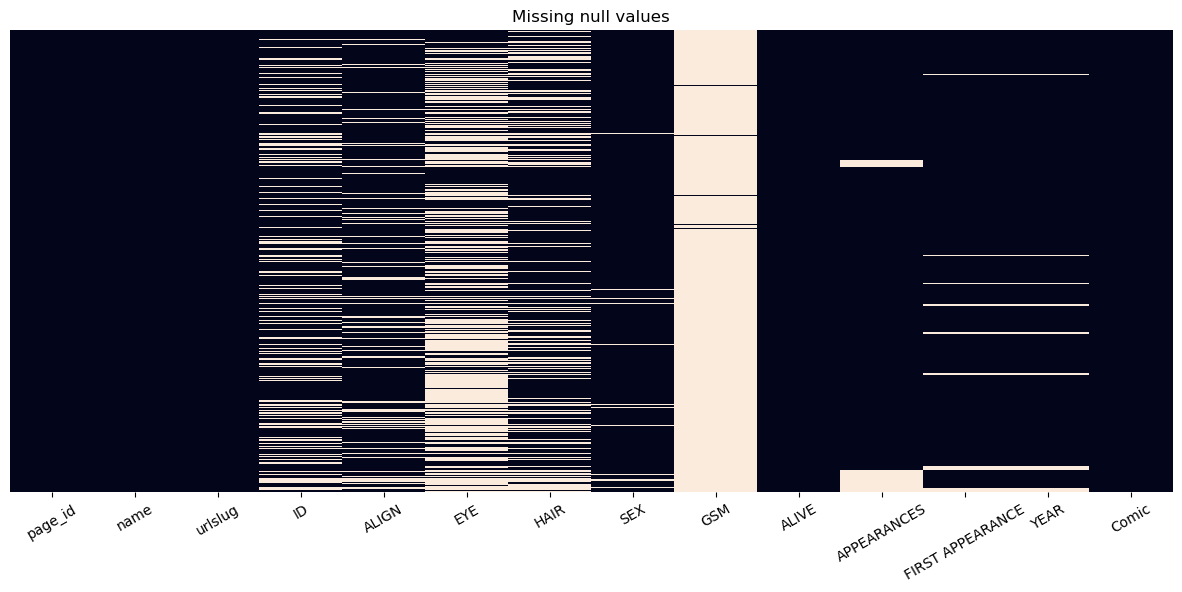

In [4]:
EDA_tool.null_check()

#### 3.2 Data wrangling

From the graph above we can better understand the situation of the null values in the dataset.

Column page_id is the unique indicator of the heros.

Column urlslug is the url of the wiki of the heros.

Column above and with EYE and HAIR, is not related to this project, so drop the column.


In [5]:
columns_to_exclude = ['page_id', 'urlslug','EYE','HAIR']
EDA_tool.delete_columns(columns_to_exclude)

['name',
 'ID',
 'ALIGN',
 'SEX',
 'GSM',
 'ALIVE',
 'APPEARANCES',
 'FIRST APPEARANCE',
 'YEAR',
 'Comic']

Column ID is the hero's identity status. Some heros' identity is not clear in comics, so replace the NaN values with "Unknown".


In [6]:
EDA_tool.ID_fix()

ID
Secret Identity                  8683
Public Identity                  6994
NaN                              5783
No Dual Identity                 1788
Known to Authorities Identity      15
Identity Unknown                    9
Name: count, dtype: int64

Column ALIGN is the stance of the hero. Replace the NaN value with 'unknown'.

In [7]:
EDA_tool.ALIGN_fix()

ALIGN
Bad Characters        9615
Good Characters       7468
NaN                   3413
Neutral Characters    2773
Reformed Criminals       3
Name: count, dtype: int64

NaN value in SEX can be replaced by 'Unknown'.

In [8]:
EDA_tool.SEX_fix()

SEX
Male Characters           16421
Female Characters          5804
NaN                         979
Agender Characters           45
Genderless Characters        20
Genderfluid Characters        2
Transgender Characters        1
Name: count, dtype: int64

Column GSM is for very little number of heros, the null value stands for no GSM. So null value is reasonable. Replace null with 'no GSM'


In [9]:
EDA_tool.GSM_fix()

GSM
NaN                       23118
Homosexual Characters       120
Bisexual Characters          29
Transgender Characters        2
Transvestites                 1
Pansexual Characters          1
Genderfluid Characters        1
Name: count, dtype: int64

Column appearances has null subject for heros that never appear in comics, but do have basic information. So replace the null value with 0.

In [10]:
EDA_tool.APPEARANCES_fix()

APPEARANCES
1.0       5812
2.0       2783
3.0       1925
4.0       1596
NaN       1451
          ... 
1162.0       1
1161.0       1
1137.0       1
1120.0       1
3093.0       1
Name: count, Length: 443, dtype: int64

In [11]:
EDA_tool.ALIVE_fix()

ALIVE
Living Characters      17059
Deceased Characters     5326
NaN                        3
Name: count, dtype: int64

Check again for null values.

name                0
ID                  0
ALIGN               0
SEX                 0
GSM                 0
ALIVE               0
APPEARANCES         0
FIRST APPEARANCE    0
YEAR                0
Comic               0
dtype: int64

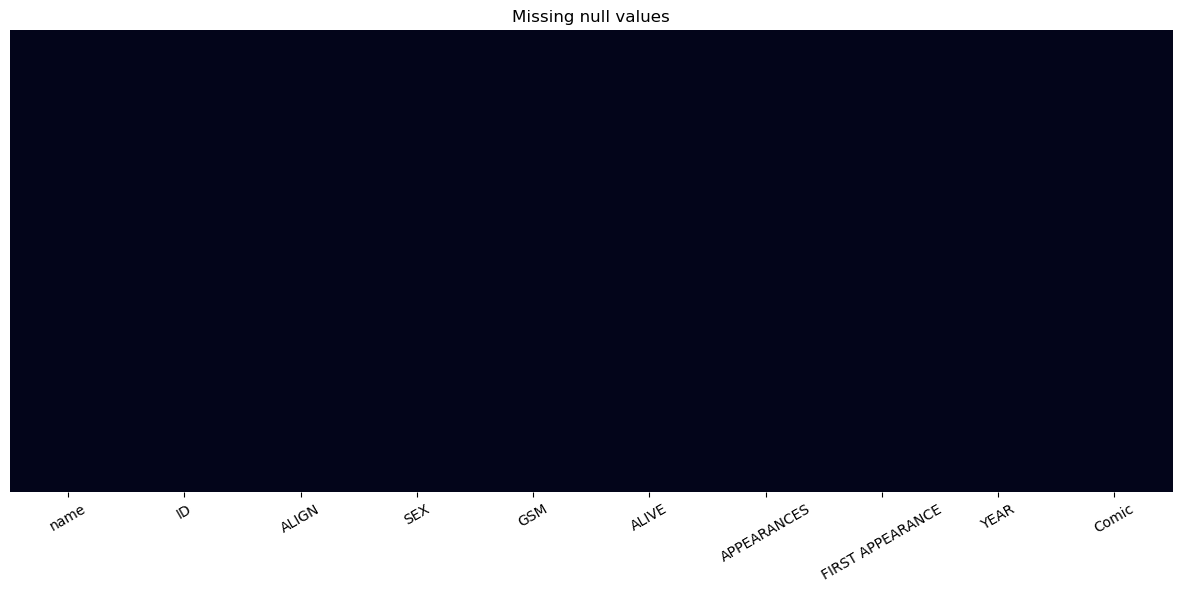

In [12]:
EDA_tool.null_check()

#### 3.3 Graphical analysis

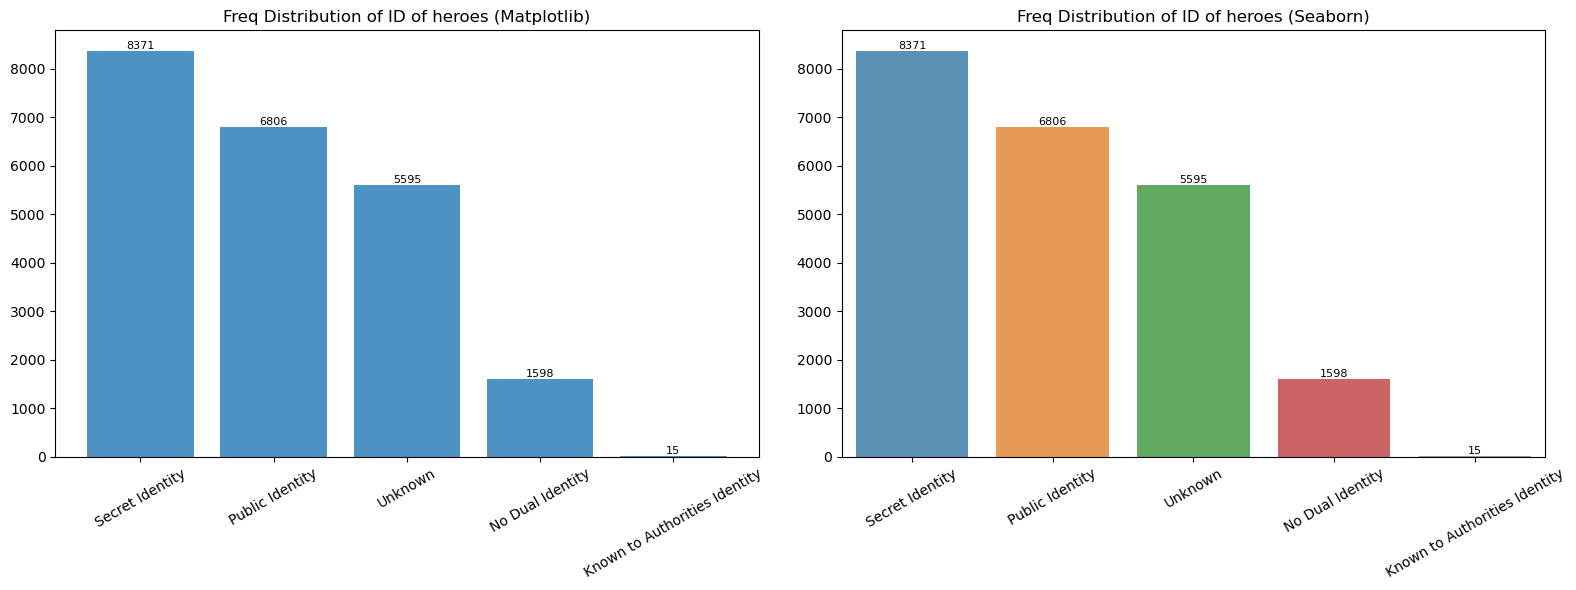

In [13]:
EDA_tool.ID()

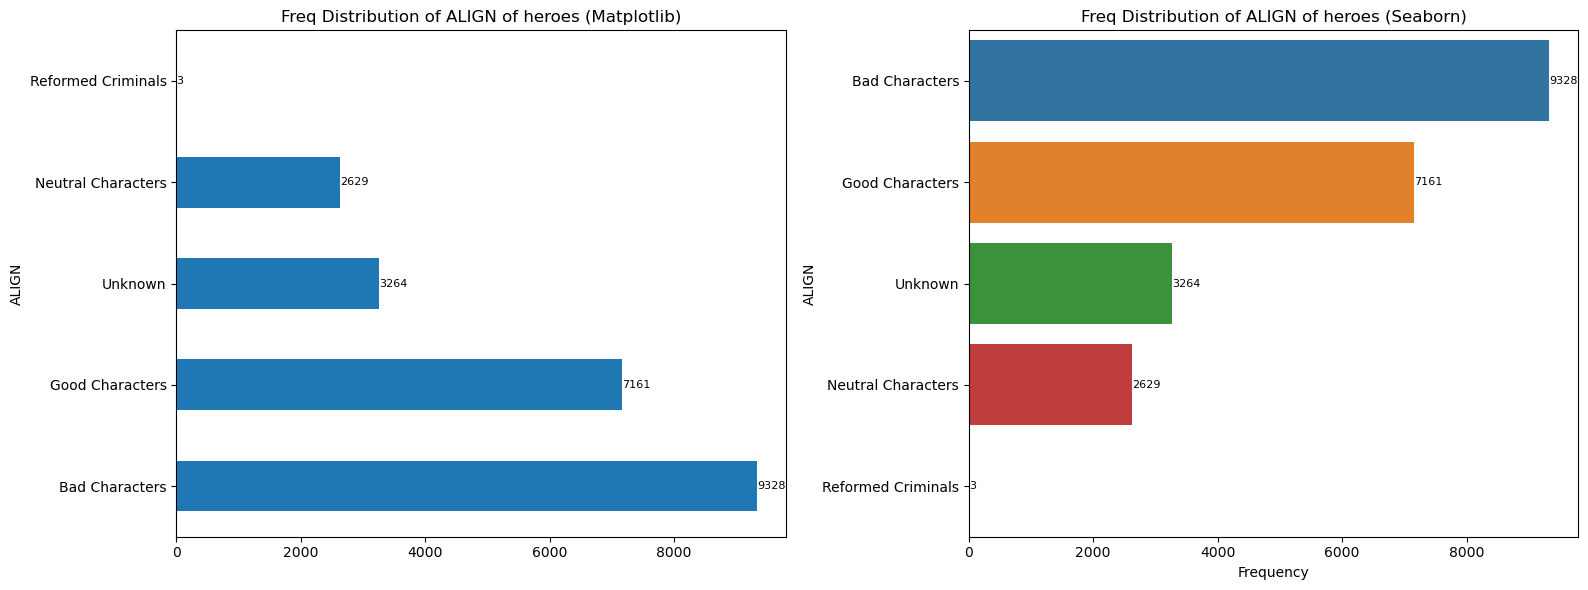

In [14]:
EDA_tool.ALIGN()

Bad characters are the most align of heroes.

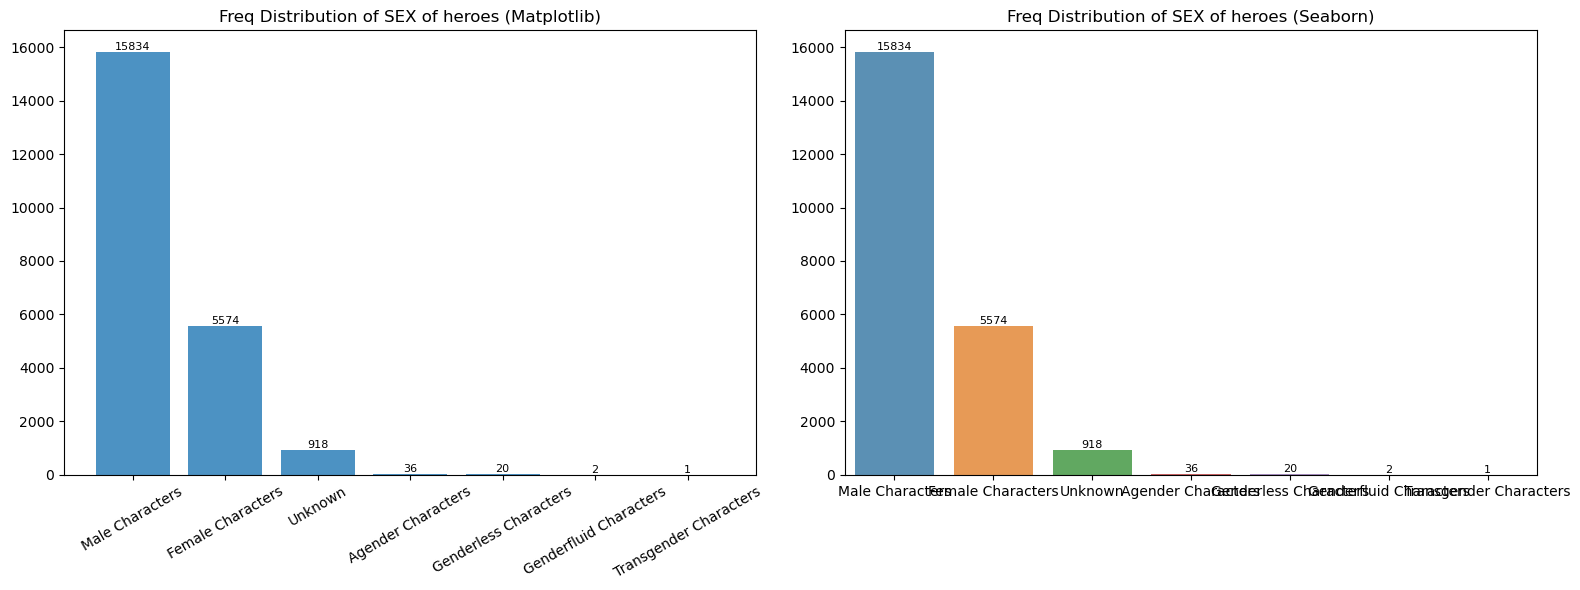

In [15]:
EDA_tool.SEX()

There are mostly male characters, with few other genders.

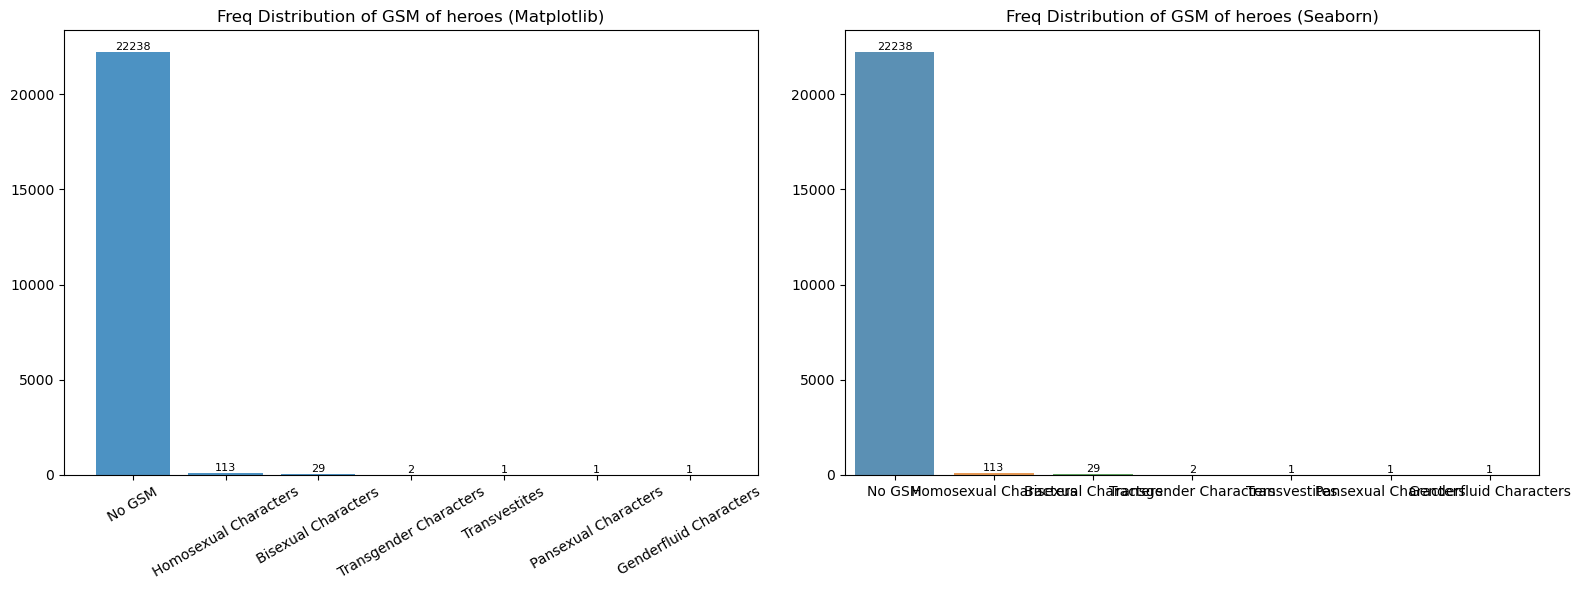

In [16]:
EDA_tool.GSM()

Most heros have no GSM, but the most GSM is homosexual.

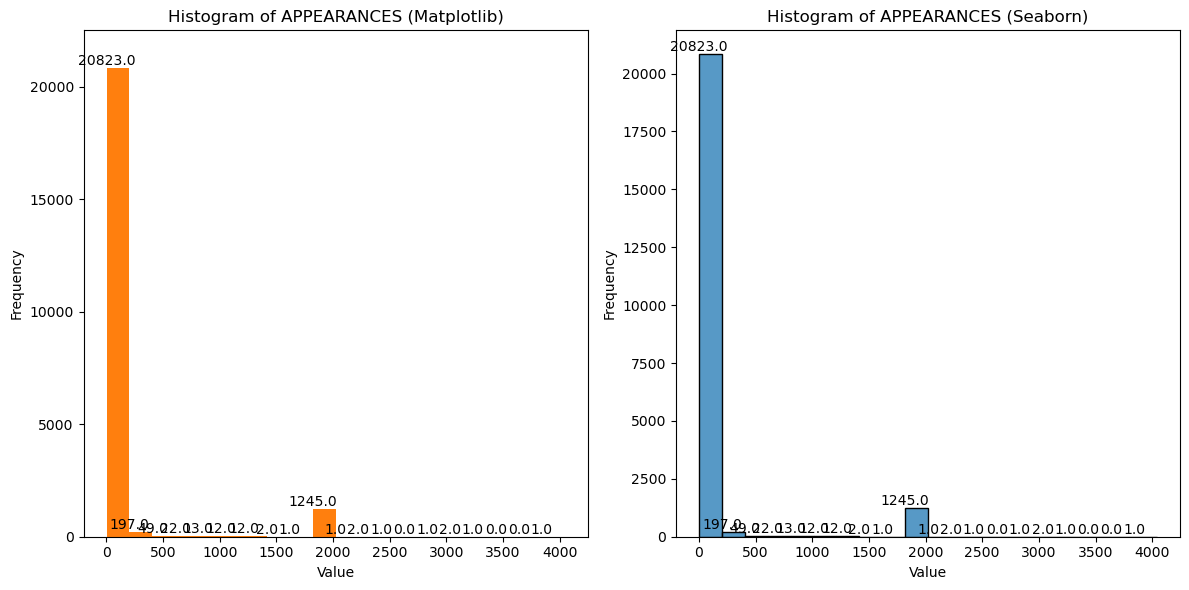

In [17]:
EDA_tool.APPEARANCES()

Most appearaces of heros are between 0 and 1. And some of the heros has about 2000 appearaces.

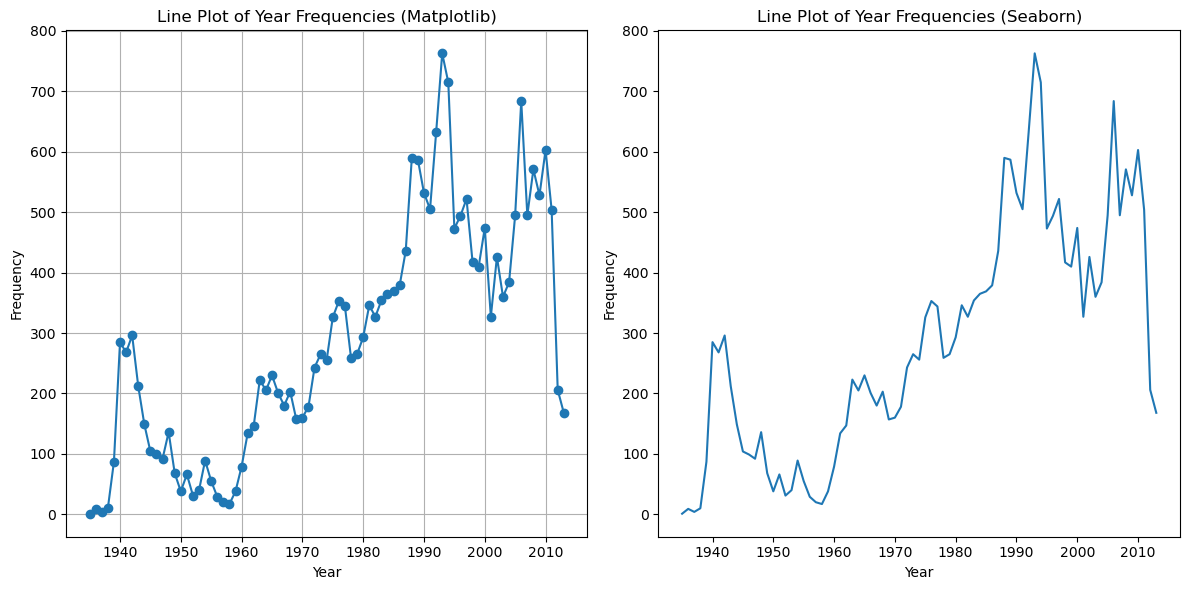

In [18]:
EDA_tool.YEAR()

New characters are increasing over the years.

### Part 4: Inferences

1. Does gender have a relationship with the ID of the hero?

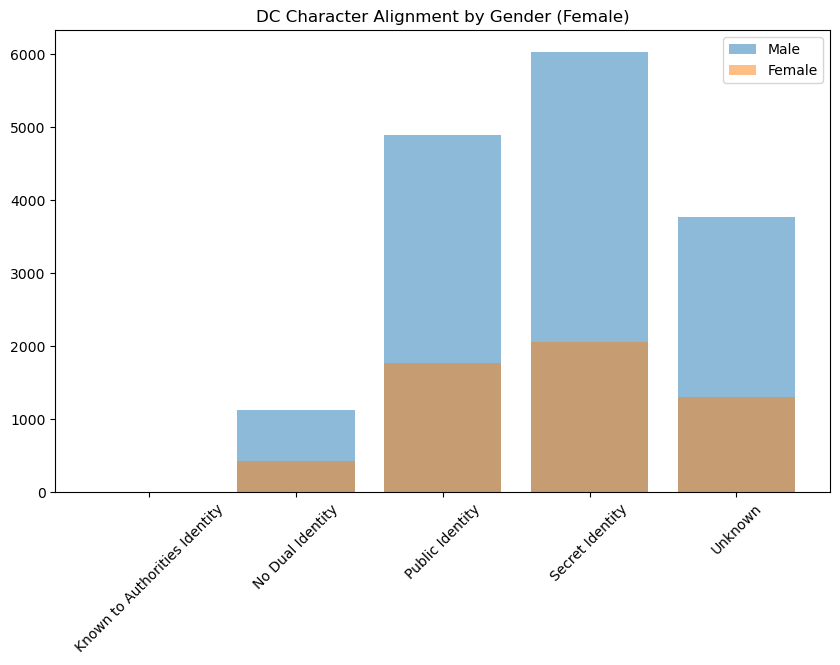

In [19]:
df = EDA_tool.dataframe()

from part4 import infer
inference = infer(df)
inference.task1()

Surely Female heroes are much less than Male heroes. And female have a higher percentage in public identity than male.

2. Does gender affect the appearances of heros?

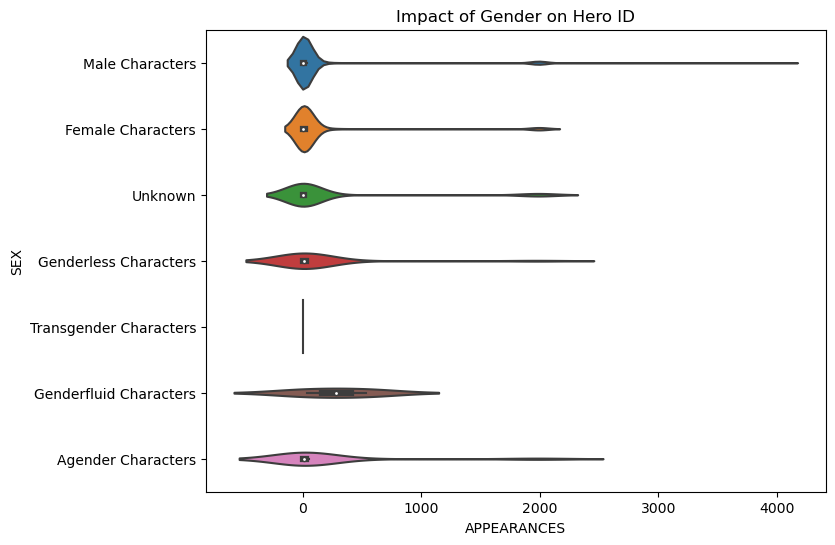

In [20]:
inference.task2()

The most appearance seem to be around 0 for all gender. However, Male characters extend the most in to higher appearances.

3. Does identity affect the appearances of heros?

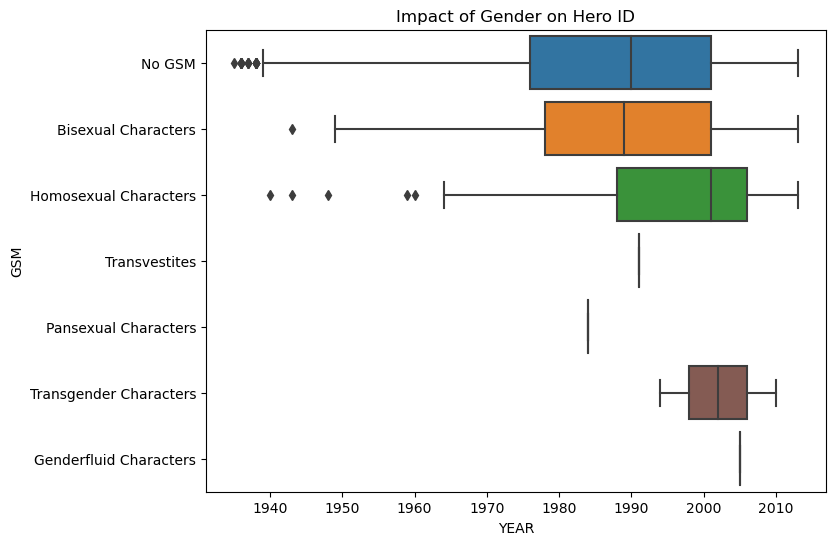

In [21]:
inference.task3()

The chart indicate that no GSM heroes appears earliest of the years. And heroes with GSM appears later in the years.

### Part 5: Conclusion

- Research questions:
1. Does gender have a relationship with the ID of the hero?
Surely Female heroes are much less than Male heroes. And female have a higher percentage in public identity than male.

2. Does gender affect the appearances of heros?
The most appearance seem to be around 0 for all gender. However, Male characters extend the most in to higher appearances.

2. Does GSM have a pattern on the scale of time?
The chart indicate that no GSM heroes appears earliest of the years. And heroes with GSM appears later in the years.